# DeepLabV3 Semantic Segmentation Binary

## Training

In [ ]:
## dataset link id
# 512_padding_binary : 1EcAeCLDTlHXf9jzBiSTbqIHMSF6WZC03

# 512_padding_multi : 1D8P-rrBKegZe_J7WLWqheYdadw4bZzEE

#### Load Dataset



```
## Resize & Padding 한 3번폴더 ( = 이격 = Spacing ) 만 불러옴 
```



In [ ]:
!gdown 1EcAeCLDTlHXf9jzBiSTbqIHMSF6WZC03
!unzip /content/512_padding_data_220722.zip

Downloading...
From: https://drive.google.com/uc?id=1EcAeCLDTlHXf9jzBiSTbqIHMSF6WZC03
To: /content/512_padding_data_220722.zip
100% 59.5M/59.5M [00:01<00:00, 55.5MB/s]


In [ ]:
!mkdir Train    # Train 폴더 생성 
!cp -r /content/make_data/3/images ./Train   # copy 후 Images 로 폴더 명 변경 
!cp -r /content/make_data/3/masks ./Train    # copy 후 Masks 로 폴더 명 변경 

#### Git clone

In [ ]:
!git clone https://github.com/msminhas93/DeepLabv3FineTuning.git

Cloning into 'DeepLabv3FineTuning'...
remote: Enumerating objects: 352, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 352 (delta 3), reused 7 (delta 2), pack-reused 340
Receiving objects: 100% (352/352), 4.09 MiB | 28.67 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [ ]:
|# DeepLabv3FineTuning 안으로 Train 폴더 이동시켜주기
##=================================================================
# To run the code with the CrackForest dataset and store the results in folder called CFExp use the following command.
# CrackForest 는 reference code 에서 쓰인 Train 파일이다. 

# >>> python main.py --data-directory CrackForest --exp_directory CFExp    >>> CrackForest 부분을 우리 Train dataset으로 경로 수정
# >>> !python main.py --data-directory /content/DeepLabv3FineTuning/Train --exp_directory CFExp

In [ ]:
cd /content/DeepLabv3FineTuning # 경로설정

/content/DeepLabv3FineTuning


In [ ]:
!ls # 경로 안의 파일들 확인

Analysis.ipynb	environment.yml  README.md			Tests
CFExp		LICENSE.md	 requirements.txt		Train
CrackForest	main.py		 segdataset.py			trainer.py
datahandler.py	model.py	 SegmentationDatasetDemo.ipynb


In [ ]:
# !pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.6 MB 3.9 MB/s 
     |████████████████████████████████| 7.3 MB 24.1 MB/s 
     |████████████████████████████████| 25.9 MB 41.4 MB/s 
     |████████████████████████████████| 748.8 MB 18 kB/s 
     |████████████████████████████████| 5.9 MB 23.7 MB/s 
     |████████████████████████████████| 70 kB 7.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0+cu113
    Uninstalling torch-1.12.0+cu113:
      Successfully uninstalled torch-1.12.0+cu113
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.0
    Uninstal

#### training

In [ ]:
import warnings # warning 메세지 무시하기
warnings.filterwarnings(action='ignore')

!python main.py --data-directory /content/DeepLabv3FineTuning/Train --exp_directory CFExp # main.py --실행 dataset경로설정 --저장시킬 경로설정

Epoch 1/25
----------
100% 38/38 [01:07<00:00,  1.77s/it]
Train Loss: 0.0255
100% 9/9 [00:09<00:00,  1.00s/it]
Test Loss: 0.0300
{'epoch': 1, 'Train_loss': 0.02546405792236328, 'Test_loss': 0.03004739060997963, 'Train_f1_score': 0.0687010757210896, 'Train_auroc': 0.5969228565215858, 'Test_f1_score': 0.10689168034225742, 'Test_auroc': 0.7257718235007029}
Epoch 2/25
----------
100% 38/38 [01:05<00:00,  1.74s/it]
Train Loss: 0.0276
100% 9/9 [00:08<00:00,  1.01it/s]
Test Loss: 0.0227
{'epoch': 2, 'Train_loss': 0.027608148753643036, 'Test_loss': 0.02272075042128563, 'Train_f1_score': 0.12428808008728336, 'Train_auroc': 0.7781854023206287, 'Test_f1_score': 0.2425586653743453, 'Test_auroc': 0.7078512194929071}
Epoch 3/25
----------
100% 38/38 [01:05<00:00,  1.72s/it]
Train Loss: 0.0149
100% 9/9 [00:09<00:00,  1.00s/it]
Test Loss: 0.0188
{'epoch': 3, 'Train_loss': 0.014867563731968403, 'Test_loss': 0.01877319999039173, 'Train_f1_score': 0.21121198860449675, 'Train_auroc': 0.8908593906234037, '

## Inference

In [ ]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [ ]:
## 앞서 학습이 완료된 weight 불러오기
# Load the trained model 
model = torch.load('./CFExp/weights.pt')
# Set the model to evaluate mode
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
# Read the log file using pandas into a dataframe
df = pd.read_csv('./CFExp/log.csv')
# Plot all the values with respect to the epochs
df.plot(x='epoch',figsize=(15,8));

In [ ]:
print(df[['Train_auroc','Test_auroc']].max())

Train_auroc    0.972638
Test_auroc     0.871449
dtype: float64


In [ ]:
ino = 2
# Read  a sample image and mask from the data-set
img = cv2.imread('/content/DeepLabv3FineTuning/Train/Images/a_012.jpg').transpose(2,0,1).reshape(1,3,512,512)
mask = cv2.imread('/content/DeepLabv3FineTuning/Train/Masks/a_012.jpg')
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.cuda.FloatTensor)/255)

(array([1.72000e+02, 2.54491e+05, 5.19800e+03, 6.72000e+02, 5.00000e+02,
        4.95000e+02, 2.93000e+02, 1.63000e+02, 1.04000e+02, 5.60000e+01]),
 array([-0.25352466, -0.11790138,  0.01772189,  0.15334517,  0.28896844,
         0.42459172,  0.560215  ,  0.6958383 ,  0.83146155,  0.9670848 ,
         1.1027081 ], dtype=float32),
 <a list of 10 Patch objects>)

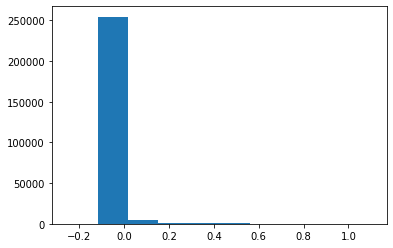

In [ ]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(a['out'].data.cpu().numpy().flatten())

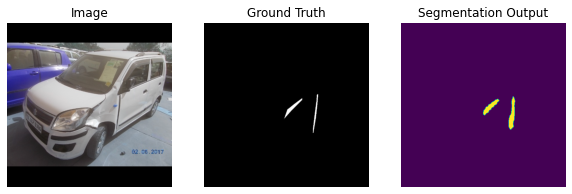

In [ ]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);
plt.imshow(img[0,...].transpose(1,2,0));
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);
plt.imshow(a['out'].cpu().detach().numpy()[0][0]>0.2);
plt.title('Segmentation Output')
plt.axis('off');
# plt.savefig('./CFExp/SegmentationOutput.png',bbox_inches='tight')

## Renewal Inference

### Inference ( Train Image )
Ground Truth와 Prediction 비교

In [ ]:
# 사용할 library import
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os

#### Load Model (weight)

In [ ]:
# Load the trained model 학습된 모델 불러오기 
model = torch.load('./CFExp/weights.pt')
# Set the model to evaluate mode
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

#### Load Log.csv

In [ ]:
# log.csv를 불러와 best weight ( min loss 기준 )부분만을 추출
df = pd.read_csv('./CFExp/log.csv')
df[df['Test_loss'] == df['Test_loss'].min()]

,epoch,Train_loss,Test_loss,Train_f1_score,Train_auroc,Train_iou,Test_f1_score,Test_auroc,Test_iou
6,7,0.011594,0.02949,0.62794,0.971545,0.498737,0.539537,0.822237,0.426958


#### Score(f1 score, acc, iou), Loss visualizing with Plot

In [ ]:
# Plot all the values with respect to the epochs
# score(f1 score, acc, iou), loss visualizing
drop_loss = df.drop(columns=['Train_loss', 'Test_loss'], axis=1)
loss_df = df[df.columns[:3]]

In [ ]:
# 꺽은선 그래프에서 색깔별로 스코어를 나누기 위해 color_list 생성
column_list = list(drop_loss.columns[1:])
color_list = ['red', 'orange', 'black', 'green', 'blue', 'purple']

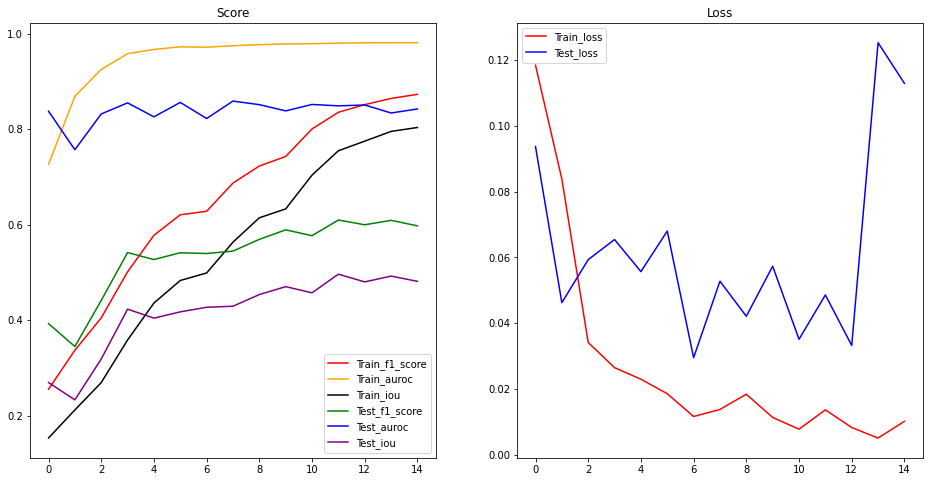

In [ ]:
fig = plt.figure(figsize=(16, 8))


ax = fig.add_subplot(1, 2, 1)
for color, column in zip(color_list, column_list):
    ax.plot(drop_loss[column], color=color, label=column)
ax.title.set_text("Score")
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(loss_df["Train_loss"], color="red", label="Train_loss")
ax.plot(loss_df["Test_loss"], color="blue", label="Test_loss")
ax.title.set_text("Loss")
ax.legend()

plt.show()

#### Prediction Visualizing

In [ ]:
## Train image, Ground truth, Prediction 비교
# Read  a sample image and mask from the data-set
img = cv2.imread('/content/a_03.jpg') # Train image 불러오기
img_plot = img.transpose(2,0,1).reshape(1,3,img.shape[0], img.shape[1]) # reshape부분에 image size 기입
mask = cv2.imread('/content/a_03_m.jpg') # Ground Truth image load
with torch.no_grad():
    a = model(torch.from_numpy(img_plot).type(torch.cuda.FloatTensor)/255)

##### Histogram

(array([125838., 106565.,  15287.,   5355.,   3015.,   2531.,   1657.,
           935.,    548.,    413.]),
 array([-0.14668296, -0.04470035,  0.05728226,  0.15926486,  0.2612475 ,
         0.36323008,  0.4652127 ,  0.5671953 ,  0.6691779 ,  0.77116054,
         0.87314314], dtype=float32),
 <a list of 10 Patch objects>)

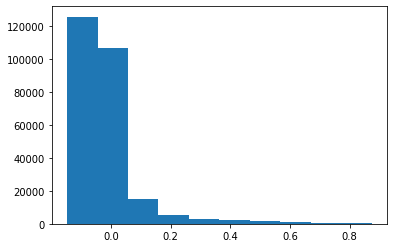

In [ ]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(a['out'].data.cpu().numpy().flatten())

##### Train Image, Ground Truth, Prediction

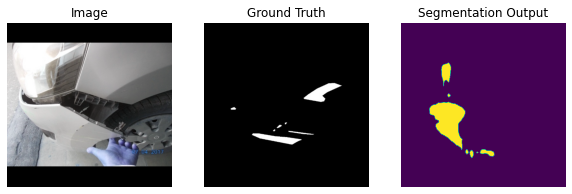

In [ ]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);
plt.imshow(img_plot[0,...].transpose(1,2,0));
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);
plt.imshow(a['out'].cpu().detach().numpy()[0][0]>0.2);
plt.title('Segmentation Output')
plt.axis('off');
# plt.savefig('./CFExp/SegmentationOutput.png',bbox_inches='tight')

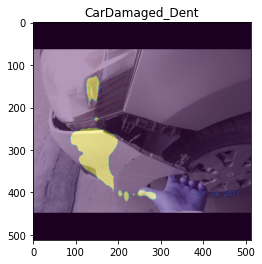

In [ ]:
## Image위에 prediction image 겹치기
plt.imshow(img)
plt.imshow(a['out'].cpu().detach().numpy()[0][0]>0.2, alpha=0.4); # alpha로 투명도 조절가능
plt.title('CarDamaged_Dent')
plt.show()

### Inference ( Test Image )

In [ ]:
# load test image
test_img = cv2.imread('/content/test2.jpg')
test_img.shape

(360, 360, 3)

In [ ]:
# ino = 2
# Read  a sample image and mask from the data-set
img = cv2.imread('/content/test2.jpg').transpose(2,0,1).reshape(1,3,test_img.shape[0], test_img.shape[1])
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.cuda.FloatTensor)/255)

(array([36202., 66510.,  6389.,  2436.,  1644.,  1486.,  1600.,  2285.,
         9964.,  1084.]),
 array([-0.15517703, -0.02877913,  0.09761877,  0.22401667,  0.35041457,
         0.47681248,  0.6032104 ,  0.72960824,  0.85600615,  0.98240405,
         1.108802  ], dtype=float32),
 <a list of 10 Patch objects>)

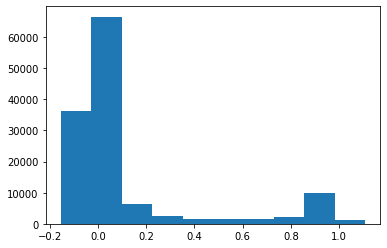

In [ ]:
plt.hist(a['out'].data.cpu().numpy().flatten())

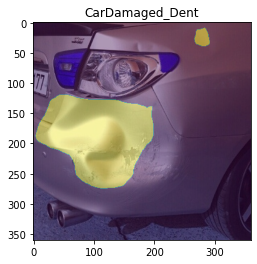

In [ ]:
img = cv2.imread('/content/test2.jpg')
plt.imshow(img)
plt.imshow(a['out'].cpu().detach().numpy()[0][0]>0.2, alpha=0.4);
plt.title('CarDamaged_Dent')
plt.show()